In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns

from data import Data
from brutforce import Brutforce
from visualizer import Visualizer
from average_approximation import AverageApproximation
from gurobi_reduced import GurobiSolverReduced

In [21]:
import matplotlib.pyplot as plt

def evaluate_solver_performance(data):
    bruteforce = Brutforce(data)
    sol_brute = bruteforce.solve()

    bruteforce = AverageApproximation(data)
    sol_average = bruteforce.solve()

    return sol_brute[0] / sol_average[0]

In [4]:
results = {}
repeats = 10
timesteps = [20]
teams = [4, 6, 8, 10]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                print(repeat, T, team)

                data = Data(T=T, num_bells=5, num_teams=team, seed=repeat)

                results[(repeat, T, team)] = evaluate_solver_performance(data)


0 20 4
0 20 6
0 20 8
0 20 10
1 20 4
1 20 6
1 20 8
1 20 10
2 20 4
2 20 6
2 20 8
2 20 10
3 20 4
3 20 6
3 20 8
3 20 10
4 20 4
4 20 6
4 20 8
4 20 10
5 20 4
5 20 6
5 20 8
5 20 10
6 20 4
6 20 6
6 20 8
6 20 10
7 20 4
7 20 6
7 20 8
7 20 10
8 20 4
8 20 6
8 20 8
8 20 10
9 20 4
9 20 6
9 20 8
9 20 10


In [5]:
df = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "ratio"],
    )

In [6]:
df[:10]

,repeat,T,teams,ratio
0,0,20,4,1.150943
1,0,20,6,1.142857
2,0,20,8,1.111111
3,0,20,10,1.120000
4,1,20,4,1.297872
5,1,20,6,1.217391
6,1,20,8,1.184783
7,1,20,10,1.170940
8,2,20,4,1.222222
9,2,20,6,1.194444


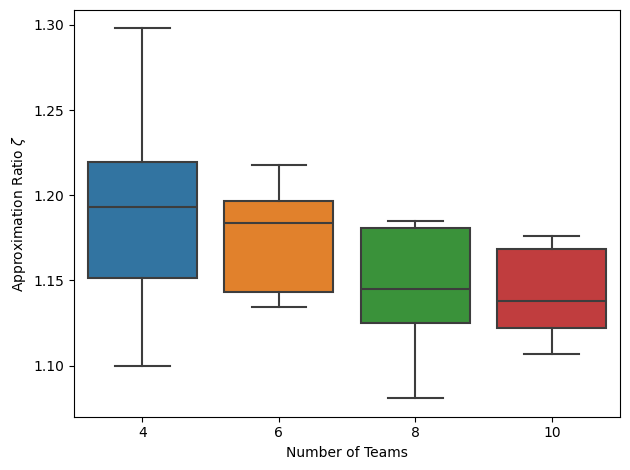

In [12]:
plot = sns.boxplot(df, x="teams", y="ratio")

plot.set_xlabel("Number of Teams")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)

In [ ]:
results = {}
repeats = 10
timesteps = [20]
teams = [5]
bells = [3, 4, 5, 6, 7, 8]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                for bell in bells:
                    print(repeat, T, team, bell)

                    data = Data(T=T, num_bells=bell, num_teams=team, seed=repeat, team_limit=10)

                    results[(repeat, T, team, bell)] = evaluate_solver_performance(data)


0 20 5 3
0 20 5 8
1 20 5 3
1 20 5 8
2 20 5 3
2 20 5 8
3 20 5 3
3 20 5 8
4 20 5 3
4 20 5 8
5 20 5 3
5 20 5 8
6 20 5 3
6 20 5 8
7 20 5 3
7 20 5 8
8 20 5 3
8 20 5 8
9 20 5 3
9 20 5 8


In [30]:
df = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "bells", "ratio"],
    )

In [31]:
df[:10]

,repeat,T,teams,bells,ratio
0,0,20,5,4,1.120000
1,0,20,5,5,1.048780
2,0,20,5,6,1.139241
3,0,20,5,7,1.121951
4,1,20,5,4,1.093333
5,1,20,5,5,1.075000
6,1,20,5,6,1.112500
7,1,20,5,7,1.150000
8,2,20,5,4,1.064103
9,2,20,5,5,1.037500


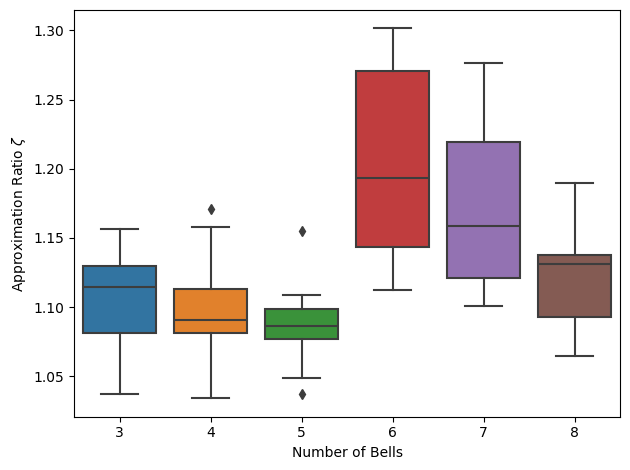

In [32]:
plot = sns.boxplot(df, x="bells", y="ratio")

plot.set_xlabel("Number of Bells")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)

In [41]:
repeats = 10
timesteps = [5, 10, 15, 20, 25, 30]
teams = [5]
bells = [5]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                for bell in bells:
                    print(repeat, T, team, bell)

                    data = Data(T=T, num_bells=bell, num_teams=team, seed=repeat, team_limit=10)

                    results[(repeat, T, team, bell)] = evaluate_solver_performance(data)


0 5 5 5
0 10 5 5
0 15 5 5
0 20 5 5
0 25 5 5
0 30 5 5
1 5 5 5
1 10 5 5
1 15 5 5
1 20 5 5
1 25 5 5
1 30 5 5
2 5 5 5
2 10 5 5
2 15 5 5
2 20 5 5
2 25 5 5
2 30 5 5
3 5 5 5
3 10 5 5
3 15 5 5
3 20 5 5
3 25 5 5
3 30 5 5
4 5 5 5
4 10 5 5
4 15 5 5
4 20 5 5
4 25 5 5
4 30 5 5
5 5 5 5
5 10 5 5
5 15 5 5
5 20 5 5
5 25 5 5
5 30 5 5
6 5 5 5
6 10 5 5
6 15 5 5
6 20 5 5
6 25 5 5
6 30 5 5
7 5 5 5
7 10 5 5
7 15 5 5
7 20 5 5
7 25 5 5
7 30 5 5
8 5 5 5
8 10 5 5
8 15 5 5
8 20 5 5
8 25 5 5
8 30 5 5
9 5 5 5
9 10 5 5
9 15 5 5
9 20 5 5
9 25 5 5
9 30 5 5


In [43]:
df = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "bells", "ratio"],
    )

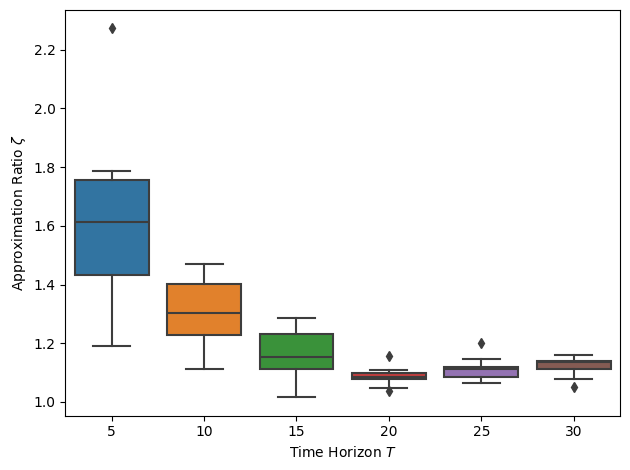

In [44]:
plot = sns.boxplot(df, x="T", y="ratio")

plot.set_xlabel("Time Horizon $T$")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)